In [1]:
# this file collects all results for 8k, under 4 read out modes, up to cls=7 or 10.

In [2]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain

from thesis_v2 import dir_dict
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
#     explored_models_20200725_generator,
    explored_models_20201118_generator,
)
from thesis_v2.analysis.io import collect_rcnn_k_bl_main_result

In [3]:
import pandas as pd

In [4]:
# get cc_max
from strflab.stats import cc_max
from thesis_v2.data.prepared.yuanyuan_8k import get_neural_data_per_trial

cc_max_all_neurons = cc_max(get_neural_data_per_trial(('042318', '043018','051018',)))
assert cc_max_all_neurons.shape == (79,)

In [5]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201118', 'main_result_separatebn.pkl')
makedirs(dirname(f_main_result), exist_ok=True)
if not exists(f_main_result):
    df_main_result = collect_rcnn_k_bl_main_result(
        fixed_keys = {
        'kernel_size_l23': 3,
        'kernel_size_l1': 9,
        'ff_1st_block': True,
        'pooling_ksize': 3,
        'pooling_type': 'avg',
        'bn_after_fc': False,
        'rcnn_bl_psize': 1,
        'rcnn_bl_ptype': None,
        'input_size': 50,
        'split_seed': 'legacy',
        'dataset_prefix': 'yuanyuan_8k_a_3day',
        'model_prefix': 'maskcnn_polished_with_rcnn_k_bl',
        'scale_name': '0.01',
        'scale': '0.01',
        'smoothness_name': '0.000005',
        'smoothness': '0.000005',
            'multi_path': True,
            'multi_path_separate_bn': True,
    },
        generator=chain(
            explored_models_20201118_generator(with_source=True, separate_bn_list=[True]),
            # more iterations cause OOM
    #             explored_models_20200801_generator(with_source=True),
    #             explored_models_20200725_generator(with_source=True),
        ),
        total_num_param=28,
        train_size_mapping={
            None: 5120,
        },
        cc_max_all_neurons=cc_max_all_neurons,
        num_neuron=79,
        skip_eval_json=True,
        no_missing_data=False,
    )
    df_main_result.to_pickle(f_main_result)
    del df_main_result
df_main_result = pd.read_pickle(f_main_result)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300


In [6]:
df_main_result.dropna()

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           2           cm-avg       1280              0.379478   
                                                                                                  2560              0.543094   
                                                                                                  5120              0.580530   
                                                                                     cm-last      1280              0.401936   
                                                                                                  2560              0.573986   
...                                                                                                                      ...   
softplus True                 poisson   1          3         32          3           cm-avg       2560              0.633767   
                                                                                                  5120              0.675405   
                                                                                     cm-last      1280              0.510449   
                                                                                                  2560              0.634020   
                                                                                                  5120              0.678429   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         8           2           cm-avg       1280           0.181373   
                                                                                                  2560           0.253170   
                                                                                                  5120           0.268277   
                                                                                     cm-last      1280           0.192658   
                                                                                                  2560           0.267190   
...                                                                                                                   ...   
softplus True                 poisson   1          3         32          3           cm-avg       2560           0.292438   
                                                                                                  5120           0.309832   
                                                                                     cm-last      1280           0.239853   
                                                                                                  2560           0.293527   
                                                                                                  5120           0.311925   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         8           2           cm-avg       1280          0.389241   
                                                                                                  2560          0.481323   
                                                                                                  5120          0.498672   
                                                                                     cm-last      1280          0.407067   
                                                                           

In [7]:
# take main results and compare
f_ref_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'main_result.pkl')
df_main_result_ref = pd.read_pickle(f_ref_result)
df_main_result_ref = df_main_result_ref[df_main_result_ref.index.get_level_values('rcnn_bl_cls') <= 7]

In [8]:
aaaa = df_main_result_ref.join(df_main_result.dropna(), how='inner', lsuffix='_ref', rsuffix='_new')

In [9]:
aaaa

cc2_normed_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
relu     False                mse       0          2         8           2           cm-avg       1280                  0.390532   
                                                                                                  2560                  0.536576   
                                                                                                  5120                  0.580945   
                                                                                     cm-last      1280                  0.376278   
                                                                                                  2560                  0.579874   
...                                                                                                                          ...   
softplus True                 poisson   1          3         32          3           cm-avg       2560                  0.634244   
                                                                                                  5120                  0.665381   
                                                                                     cm-last      1280                  0.585469   
                                                                                                  2560                  0.636072   
                                                                                                  5120                  0.671014   

                                                                                                              cc2_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                    
relu     False                mse       0          2         8           2           cm-avg       1280               0.187182   
                                                                                                  2560               0.250899   
                                                                                                  5120               0.269328   
                                                                                     cm-last      1280               0.178842   
                                                                                                  2560               0.269225   
...                                                                                                                       ...   
softplus True                 poisson   1          3         32          3           cm-avg       2560               0.292134   
                                                                                                  5120               0.305727   
                                                                                     cm-last      1280               0.271677   
                                                                                                  2560               0.293301   
                                                                                                  5120               0.308557   

                                                                                                              cc_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           2           cm-avg       1280              0.398958   
                                                                                                  2560              0.477141   
                                                                                                  5120              0.498833   
                                                                           

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from thesis_v2.plots.basic import scatter

In [11]:
from scipy.stats import pearsonr

1280
2560
5120


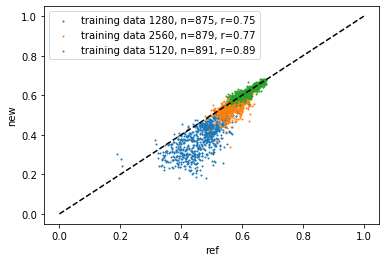

cm-avg
cm-last


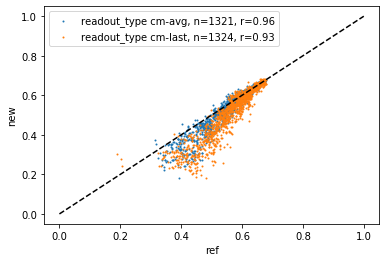

In [12]:
def plot_scatter():
    fig, ax = plt.subplots(squeeze=True);
    for train_keep in aaaa.index.get_level_values('train_keep').unique():
        b = aaaa.xs(train_keep, level='train_keep')
        n = b.shape[0]
        r = pearsonr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
        ax.scatter(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values, s=1,
                   label='training data {}, n={}, r={:.2f}'.format(
                       train_keep, n, r
                   )
                  )
        
        # compute pearson
        print(train_keep)
        
        
    ax.set_xlabel('ref')
    ax.set_ylabel('new')
    ax.plot([0,1],[0,1],linestyle='--',color='k')
    ax.legend()
    plt.show()
    
    # show readout type
    fig, ax = plt.subplots(squeeze=True)
    for train_keep in aaaa.index.get_level_values('readout_type').unique():
        b = aaaa.xs(train_keep, level='readout_type')
        n = b.shape[0]
        r = pearsonr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
        ax.scatter(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values, s=1,
                   label='readout_type {}, n={}, r={:.2f}'.format(
                       train_keep, n, r
                   )
                  )
        
        # compute pearson
        print(train_keep)
        
        
    ax.set_xlabel('ref')
    ax.set_ylabel('new')
    ax.plot([0,1],[0,1],linestyle='--',color='k')
    ax.legend()
    plt.show()
    
plot_scatter()

In [13]:
from scipy.stats import pearsonr
pearsonr(aaaa['cc2_normed_avg_ref'].values, aaaa['cc2_normed_avg_new'].values)

(0.9303934264405851, 0.0)

In [14]:
df_main_result[df_main_result.isnull().any(axis=1)].index.get_level_values('rcnn_bl_cls').value_counts()
# high count models have OOM.

7     371
6     248
10    241
9     225
8     206
5     144
4      48
Name: rcnn_bl_cls, dtype: int64